TODO:
- Add meaningful colors to the plots
- Rename labels

### Import Libraries

In [97]:
import pandas as pd
import numpy as np

### Load Data

In [98]:
FILENAME = "fake_job_postings.csv"
INDEX = "job_id"

df = pd.read_csv(FILENAME)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Clean Data

#### Index

In [99]:
# Set index
df.set_index(INDEX, inplace=True)

#### Drop columns

In [100]:
columns_to_drop = ["location", "department", "salary_range", "industry"]
df.drop(columns_to_drop, axis=1, inplace=True)

#### Binary columns

In [101]:
# Convert binary columns to boolean
bool_columns = ["telecommuting", "has_company_logo", "has_questions", "fraudulent"]
df[bool_columns] = df[bool_columns].astype("bool")

#### Employment type

In [102]:
FULL_TIME = "Full-time"
PART_TIME = "Part-time"
OTHER = "Other"

# Map employment type values
df["employment_type"] = df["employment_type"].map({
    "Full-time": FULL_TIME,
    "Part-time": PART_TIME,
    "Other": OTHER,
    "Contract": OTHER,
    "Temporary": OTHER,
})

#### Required experience

In [103]:
JUNIOR = "Junior"
STANDARD = "Standard"
SENIOR = "Senior"

# Map required experience values
df["required_experience"] = df["required_experience"].map({
    "Internship": JUNIOR,
    "Not Applicable": np.nan,
    "Mid-Senior level": STANDARD,
    "Associate": STANDARD,
    "Entry level": JUNIOR,
    "Executive": SENIOR,
    "Director": SENIOR
})

#### Required education

In [104]:
HIGHSCHOOL = "Highschool"
UNDERGRADUATE = "Undergraduate"
POSTGRADUATE = "Postgraduate"
Other = "Other"

df["required_education"] = df["required_education"].map({
    "Bachelor's Degree": UNDERGRADUATE, 
    "Master's Degree": POSTGRADUATE,
    'High School or equivalent': HIGHSCHOOL, 
    'Unspecified': np.nan,
    'Some College Coursework Completed': HIGHSCHOOL, 
    'Vocational': OTHER, 
    'Certification': OTHER,
    'Associate Degree': UNDERGRADUATE, 
    'Professional': OTHER, 
    'Doctorate': POSTGRADUATE,
    'Some High School Coursework': HIGHSCHOOL, 
    'Vocational - Degree': OTHER,
    'Vocational - HS Diploma': OTHER
})

#### Function

In [108]:
BUSINESS = "Business"
HEALTHCARE = "Healthcare"
INFORMATION_TECHNOLOGY = "Information Technology"
ENGINEERING = "Engineering"
DESIGN = "Design"
EDUCATION = "Education"
FINANCE = "Finance"
SCIENCE = "Science"
LEGAL = "Legal"
OTHER = "Other"

df["function"] = df["function"].map({
    'Marketing': BUSINESS, 
    'Customer Service': BUSINESS, 
    'Sales': BUSINESS,
    'Health Care Provider': HEALTHCARE, 
    'Management': BUSINESS, 
    'Information Technology': INFORMATION_TECHNOLOGY,
    'Other': OTHER, 
    'Engineering': ENGINEERING, 
    'Administrative': BUSINESS, 
    'Design': DESIGN, 
    'Production': BUSINESS,
    'Education': EDUCATION, 
    'Supply Chain': BUSINESS, 
    'Business Development': BUSINESS,
    'Product Management': BUSINESS, 
    'Financial Analyst': FINANCE, 
    'Consulting': BUSINESS,
    'Human Resources': BUSINESS, 
    'Project Management': BUSINESS, 
    'Manufacturing': BUSINESS,
    'Public Relations': BUSINESS, 
    'Strategy/Planning': BUSINESS, 
    'Advertising': BUSINESS, 
    'Finance': FINANCE,
    'General Business': BUSINESS, 
    'Research': OTHER, 
    'Accounting/Auditing': FINANCE,
    'Art/Creative': DESIGN, 
    'Quality Assurance': INFORMATION_TECHNOLOGY, 
    'Data Analyst': INFORMATION_TECHNOLOGY,
    'Business Analyst': BUSINESS, 
    'Writing/Editing': DESIGN, 
    'Distribution': BUSINESS, 
    'Science': SCIENCE,
    'Training': OTHER, 
    'Purchasing': BUSINESS, 
    'Legal': LEGAL
})

### Export Data

In [109]:
df.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
job_id,,,,,,,,,,,,,
1,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,False,True,False,Other,Junior,NaN,Business,False
2,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,False,True,False,Full-time,NaN,NaN,Business,False
3,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,False,True,False,NaN,NaN,NaN,NaN,False
4,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,False,True,False,Full-time,Standard,Undergraduate,Business,False
5,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,False,True,True,Full-time,Standard,Undergraduate,Healthcare,False


In [110]:
df.to_csv("cleaned_" + FILENAME)

In [3]:
def clean_label_name(text):
    return text.replace("_", " ").title()

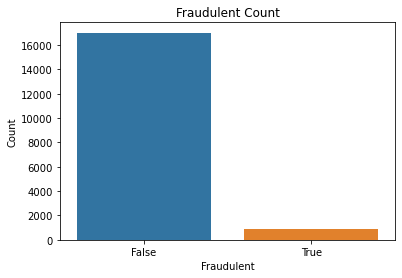

In [4]:
col = "fraudulent"
clean_label = clean_label_name(col)
ax = sns.countplot(x=col, data=df)
ax.set(xlabel=clean_label, ylabel='Count', title=f'{clean_label} Count')
plt.show()

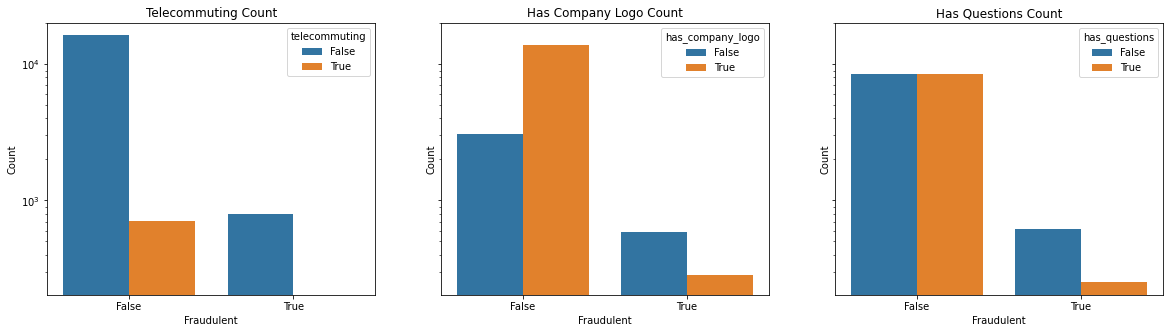

In [5]:
binary_columns = ["telecommuting", "has_company_logo", "has_questions"]
f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
for i in range(len(binary_columns)):
    col = binary_columns[i]
    ax = axes[i]
    ax = sns.countplot(x="fraudulent", hue=col, data=df, ax=ax)
    ax.set(xlabel=clean_label_name("fraudulent"), ylabel='Count', title=f'{clean_label_name(col)} Count', yscale="log")
plt.show()

In [6]:
df_fake = df[df["fraudulent"] == True]
df_real = df[df["fraudulent"] == False]

In [8]:
df["employment_type"].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

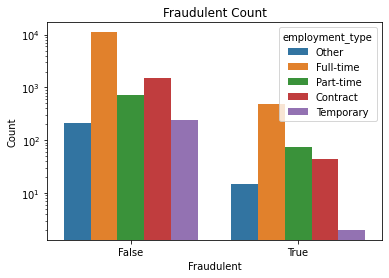

In [11]:
col = "fraudulent"
clean_label = clean_label_name(col)
ax = sns.countplot(x=col, hue="employment_type", data=df)
ax.set(xlabel=clean_label, ylabel='Count', title=f'{clean_label} Count', yscale='log')
plt.show()

In [12]:
df["required_experience"].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [13]:
df["required_education"].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)